In [ ]:
import pandas as pd
import numpy as np

In [ ]:
churn = pd.read_csv(r"C:\Users\lenovo\Desktop\Einstein\Projects\customer_churn-2.csv")

In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn.duplicated().sum()

0

SeniorCitizen        AxesSubplot(0.125,0.11;0.227941x0.77)
tenure            AxesSubplot(0.398529,0.11;0.227941x0.77)
MonthlyCharges    AxesSubplot(0.672059,0.11;0.227941x0.77)
dtype: object

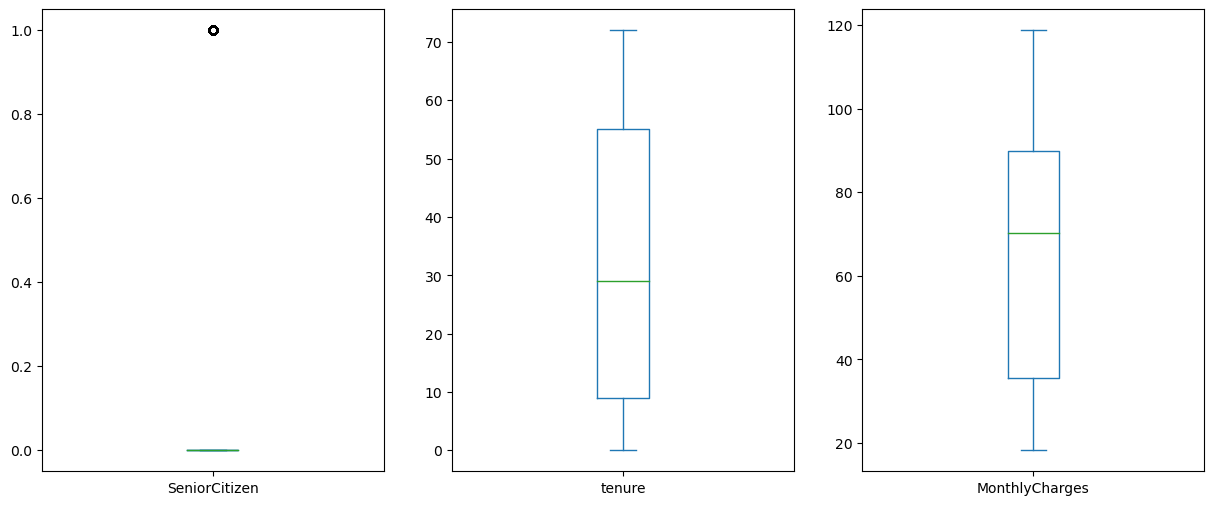

In [ ]:
churn.plot(kind = 'box', subplots = True, figsize = (15, 6))

In [ ]:
print(churn.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
df = churn.copy()

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df['TotalCharges'].nunique()

6530

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(7032, 21)

# Id not required for the solution so drop

In [ ]:
df.drop(columns = 'customerID', inplace = True)

In [ ]:
df.shape

(7032, 20)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
for col in churn.drop(columns = ['customerID', 'TotalCharges']).columns:
    if churn[col].dtype == 'object':
        print(col, ':', list(zip(churn[col].unique(), df[col].unique())))

gender : [('Female', 0), ('Male', 1)]
Partner : [('Yes', 1), ('No', 0)]
Dependents : [('No', 0), ('Yes', 1)]
PhoneService : [('No', 0), ('Yes', 1)]
MultipleLines : [('No phone service', 1), ('No', 0), ('Yes', 2)]
InternetService : [('DSL', 0), ('Fiber optic', 1), ('No', 2)]
OnlineSecurity : [('No', 0), ('Yes', 2), ('No internet service', 1)]
OnlineBackup : [('Yes', 2), ('No', 0), ('No internet service', 1)]
DeviceProtection : [('No', 0), ('Yes', 2), ('No internet service', 1)]
TechSupport : [('No', 0), ('Yes', 2), ('No internet service', 1)]
StreamingTV : [('No', 0), ('Yes', 2), ('No internet service', 1)]
StreamingMovies : [('No', 0), ('Yes', 2), ('No internet service', 1)]
Contract : [('Month-to-month', 0), ('One year', 1), ('Two year', 2)]
PaperlessBilling : [('Yes', 1), ('No', 0)]
PaymentMethod : [('Electronic check', 2), ('Mailed check', 3), ('Bank transfer (automatic)', 0), ('Credit card (automatic)', 1)]
Churn : [('No', 0), ('Yes', 1)]


# Visualization

<AxesSubplot:>

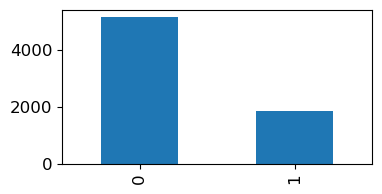

In [ ]:
df['Churn'].value_counts().plot(kind = 'bar', figsize = (4, 2), fontsize = 12)

In [ ]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

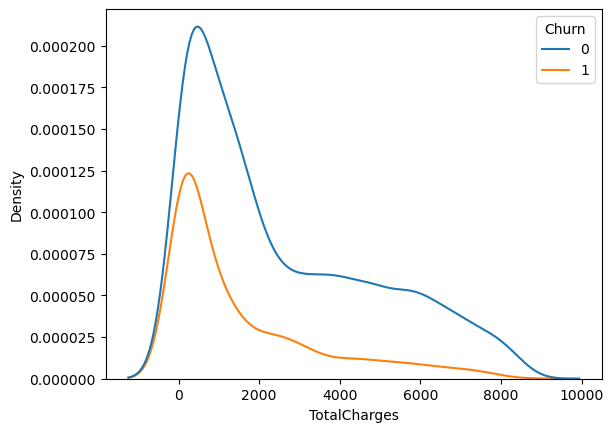

In [ ]:
sns.kdeplot(data = df, x = 'TotalCharges', hue = 'Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

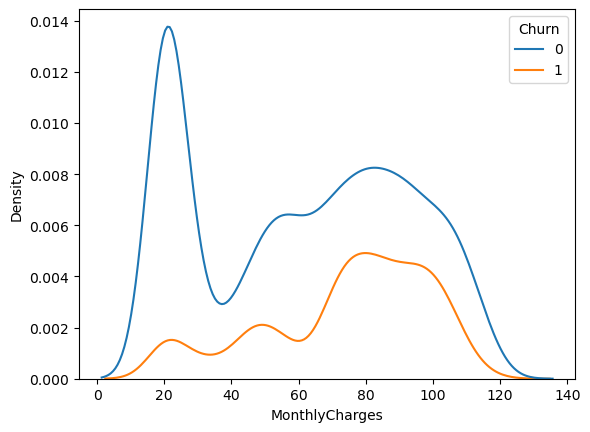

In [ ]:
sns.kdeplot(data = df, x = 'MonthlyCharges', hue = 'Churn')

<AxesSubplot:xlabel='tenure', ylabel='Density'>

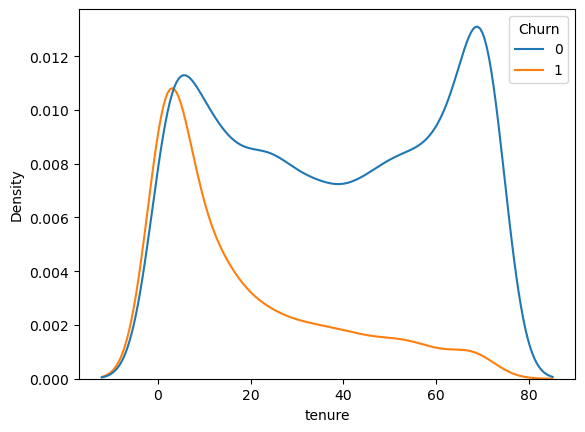

In [ ]:
sns.kdeplot(data = df, x = 'tenure', hue = 'Churn')

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

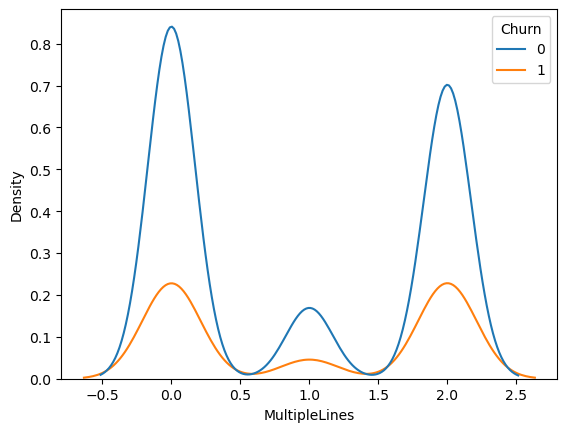

In [ ]:
sns.kdeplot(data = df, x = 'MultipleLines', hue = 'Churn')

In [ ]:
list(zip(churn['MultipleLines'].unique(), df['MultipleLines'].unique()))

[('No phone service', 1), ('No', 0), ('Yes', 2)]

<AxesSubplot:>

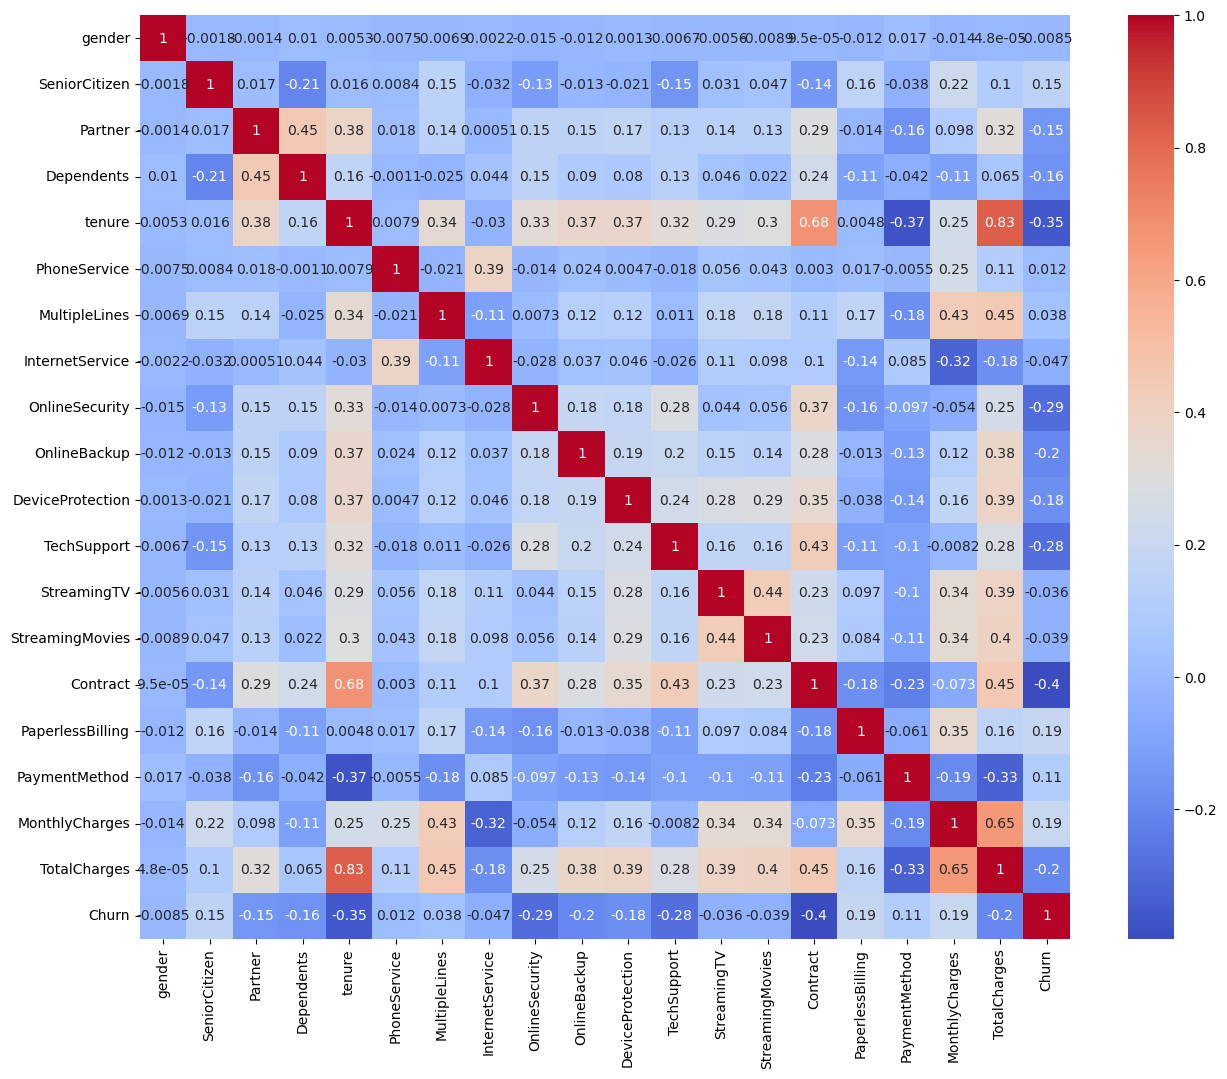

In [ ]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
# train test
# df.iloc[:, : -1].values
x = df.drop(columns = 'Churn')
y = df['Churn']

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.metrics import accuracy_score

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(x_test)
print('training accuracy : ', accuracy_score(rfc.predict(x_train), y_train))
print('testing accuracy : ', accuracy_score(y_test, y_pred))

training accuracy :  0.9978666666666667
testing accuracy :  0.7945984363894811


# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt = dt.predict(x_test)

In [ ]:
print('training accuracy : ', accuracy_score(dt.predict(x_train), y_train))
print('testing accuracy : ',accuracy_score(y_pred, y_test))

training accuracy :  0.9978666666666667
testing accuracy :  0.7945984363894811


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ylr =lr.predict(x_test)
print('training accuracy : ', accuracy_score(lr.predict(x_train), y_train))
print('testing accuracy : ', accuracy_score(ylr, y_test))

training accuracy :  0.8005333333333333
testing accuracy :  0.7974413646055437


# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty' : ('l1', 'l2', 'elasticnet', None), 'C' : [1, 2,3,4,5,6,7,8,9,10]}
gs = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5)
gs.fit(x_train, y_train)

In [ ]:
gs.best_params_

{'C': 8, 'penalty': 'l2'}

In [ ]:
lr_hp = LogisticRegression(C = 8, penalty = 'l2')
lr_hp.fit(x_train, y_train)
ylr_hp =lr_hp.predict(x_test)
print('training accuracy : ', accuracy_score(lr_hp.predict(x_train), y_train))
print('testing accuracy : ', accuracy_score(ylr_hp, y_test))

training accuracy :  0.8005333333333333
testing accuracy :  0.7974413646055437


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
params = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
    'criterion': ["gini", "entropy", "log_loss"]
}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]})

In [ ]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 88}

In [ ]:
dthp = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 88)
dthp.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=88)

In [ ]:
dthp.fit(x_train, y_train)
ydt_hp =dthp.predict(x_test)
print('training accuracy : ', accuracy_score(dthp.predict(x_train), y_train))
print('testing accuracy : ', accuracy_score(ydt_hp, y_test))

training accuracy :  0.8056888888888889
testing accuracy :  0.7839374555792467


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100}


training accuracy :  0.8058666666666666
testing accuracy :  0.7860696517412935

In [ ]:
li = []
for i in range(1, 100):
    li.append(i)
print(li)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


# HPT on randomforest

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
gs = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 10)

In [ ]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [ ]:
gs.best_params_

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}

In [ ]:
rf = RandomForestClassifier(max_depth = 6, max_features = None, max_leaf_nodes = 9, n_estimators = 25)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)

In [ ]:
rf.fit(x_train, y_train)
y_rf =rf.predict(x_test)
print('training accuracy : ', accuracy_score(rf.predict(x_train), y_train))
print('testing accuracy : ', accuracy_score(y_rf, y_test))

training accuracy :  0.7994666666666667
testing accuracy :  0.7995735607675906
